# Uso de callbacks: Early Stop
*Modificación del ejemplo regresión*

### Inportaciones

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Input
import numpy as np
from keras.callbacks import EarlyStopping
from tensorflow import keras
import matplotlib.pyplot as plt

### Lectura de la información

#### Montar Google Drive

In [2]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/CursoDL/datasets/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Mounted at /content/gdrive


#### Lectura del fichero

In [3]:
dataset = np.loadtxt(DIRECTORIO + 'hourly_wages_data.csv', delimiter=',', skiprows=1)
n_cols_total = dataset.shape[1]       # columnas del dataset
train_X = dataset[:, 1:n_cols_total]
train_y = dataset[:, 0]               # el objetivo está en la 1ª columna

n_cols = n_cols_total - 1             # = train_X.shape[1] # columnas entrenamiento

### Construcción y compilación del modelo

In [4]:
modelo = Sequential() # crea modelo
# entradas
modelo.add(Input(shape=(n_cols,)))

# se añaden capas al modelo
modelo.add(Dense(200, activation='relu'))
modelo.add(Dense(200, activation='relu'))
modelo.add(Dense(200, activation='relu'))
modelo.add(Dense(1))

# red más pequeña para comparar
# model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1))

#compilar con MSE como medida de calidad
optimizador = keras.optimizers.Adam(learning_rate = 1e-4)
modelo.compile(optimizer=optimizador, loss='mean_squared_error', metrics=['mse'])


### Deficición de una *callback EarlyStopping* para dejar de entrenar cuando no hay mejora

In [5]:
# establece monitor de early stopping: termina de entrenar cuando no hay mejora
early_stopping_monitor = EarlyStopping(patience=20, verbose=2)

### Entrenamiento del modelo con *callback*

In [6]:
# entrenamiento del modelo con early stopping
historial=modelo.fit(train_X, train_y, validation_split=0.2, epochs=100, callbacks=[early_stopping_monitor])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 53.1339 - mse: 53.1339 - val_loss: 52.2737 - val_mse: 52.2737
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 21.2067 - mse: 21.2067 - val_loss: 39.2082 - val_mse: 39.2082
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.9713 - mse: 26.9713 - val_loss: 39.3469 - val_mse: 39.3469
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.5847 - mse: 23.5847 - val_loss: 36.8436 - val_mse: 36.8436
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4685 - mse: 22.4685 - val_loss: 33.1229 - val_mse: 33.1229
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.5896 - mse: 23.5896 - val_loss: 33.0975 - val_mse: 33.0975
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.9613 - mse: 14.9613 - val_loss: 31.6438 - val_mse: 31.6438
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.4307 - mse: 25.4307 - val_loss: 31.7318 - val_mse: 31.7318
Epoch 9/100
14/14 ━━━━━━━━━━━

### Visualización del resultado

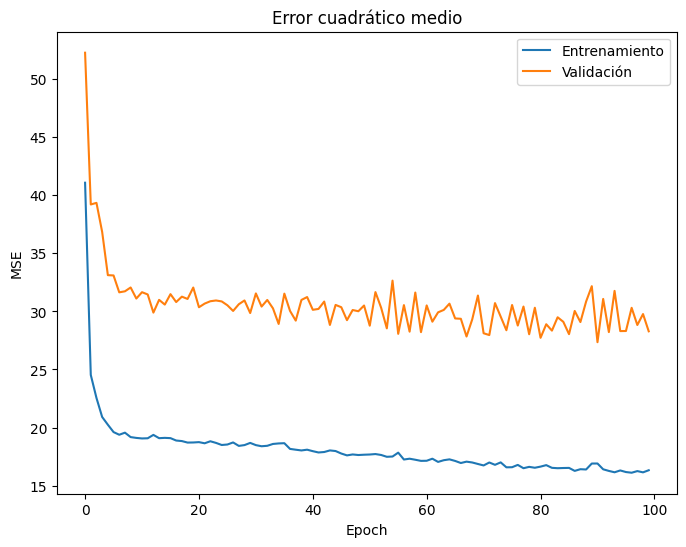

In [7]:
plt.figure(figsize=(8,6))
plt.plot(historial.history['mse'])
plt.plot(historial.history['val_mse'])
plt.title('Error cuadrático medio')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right');